# **News Cateogry Classification**

* 200k+ News Headlines
* 41 Categories

To download data visit **[here](https://www.kaggle.com/rmisra/news-category-dataset/home)**

### Specify the memory used by GPU (optional)

In [1]:
# import tensorflow as tf

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#     try:
#         tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4000)])
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#         print(e)

## **Data Preprocessing**

### Load Data

In [2]:
import json
import numpy as np

data = []

with open("data/News_Category_Dataset_v2.json",'r') as f:
    for line in f:
        data.append(json.loads(line))

np.random.shuffle(data)
print('number of records:', len(data))
print('first record:', data[0])

number of records: 200853
first record: {'category': 'HOME & LIVING', 'headline': 'How To Clean A Coffee Maker Using This...Fruit?', 'authors': 'Diana N. Nguyen', 'link': 'https://www.huffingtonpost.com/entry/how-to-clean-coffee-maker_us_5b9bc563e4b03a1dcc7a38f2', 'short_description': "If you're a daily coffee drinker, you know that going out for a cup of joe can add up to a pricey monthly expense. Thankfully", 'date': '2012-05-30'}


### A look on Labels

In [3]:
labels = set()

for i in data:
    labels.add(i["category"])

print('unique labels:', sorted(labels, reverse=False))
print('\nunique length of labels:', len(labels))

unique labels: ['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE', 'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION', 'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK', 'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT', 'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS', 'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS', 'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST', 'TRAVEL', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS', 'WOMEN', 'WORLD NEWS', 'WORLDPOST']

unique length of labels: 41


### A look on Features

In [4]:
features = []

for i in data:
    features.append(i['headline'] + " " + i['short_description'])

print('feature[0]:', features[0])

min_feature_len = min(len(i) for i in features)
print('min feature length:', min_feature_len)

max_feature_len = max(len(i) for i in features)
print('max feature length:', max_feature_len)

feature[0]: How To Clean A Coffee Maker Using This...Fruit? If you're a daily coffee drinker, you know that going out for a cup of joe can add up to a pricey monthly expense. Thankfully
min feature length: 1
max feature length: 1487


### Importing StopWords

In [5]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

stpwords = stopwords.words('english')
print('\nnumber of stopwords:', len(stpwords))
print('\nfirst 10 stopwords:', stpwords[:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

number of stopwords: 179

first 10 stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


### Preparing Data

In [6]:
  new_features = []
  
  # for line in features:
  #   a = []
  #   for word in line.split():

  #       if word not in stpwords:
  #           a.append(word.lower())

  #   new_features.append(' '.join(a))

labels = []


for idx, i in enumerate(data):
    a = []
    for word in features[idx].split():

        if word.lower() not in stpwords:
            a.append(word.lower())
    
    if len(a) > 5:
        new_features.append(' '.join(a))


        if i['category'] in ["ARTS", "CULTURE & ARTS"]:
            i['category'] = "ARTS & CULTURE"
        if i['category'] in ["HOME & LIVING", "HEALTHY LIVING"]:
            i['category'] = "LIVING"
        if i['category'] == "STYLE":
            i['category'] = "STYLE & BEAUTY"
        if i['category'] == "WORLDPOST":
            i['category'] = "THE WORLDPOST"
        if i['category'] == "PARENTING":
            i['category'] = "PARENTS"
        labels.append(i['category'])

print("length of unique labels:", len(list(set(labels))))
print('length of labels:', len(labels))
print('length of new_features:', len(new_features))
print('\nold features[0]:', features[0])
print('new feature[0]:', new_features[0])

length of unique labels: 35
length of labels: 194458
length of new_features: 194458

old features[0]: How To Clean A Coffee Maker Using This...Fruit? If you're a daily coffee drinker, you know that going out for a cup of joe can add up to a pricey monthly expense. Thankfully
new feature[0]: clean coffee maker using this...fruit? daily coffee drinker, know going cup joe add pricey monthly expense. thankfully


### A look on Shuffled Labels

In [7]:
for i in range(10):
    print(labels[i])

LIVING
TRAVEL
POLITICS
WELLNESS
BLACK VOICES
TECH
POLITICS
TRAVEL
WELLNESS
POLITICS


### Labels Encoding

In [8]:
label_unique = list(set(labels))
print('labels without indices:', label_unique)

labels_encode = {}
for i, name in enumerate(label_unique):
    labels_encode.update({name:i})

print('\nlabels with indices:', labels_encode)

new_labels = []

for i in labels:
    new_labels.append(labels_encode[i])

print('\nlabels before indices:')
for i in range(5):
    print(labels[i])

print('\nlabels after indices:')
for i in range(5):
    print(new_labels[i])

## Another way
# from sklearn.preprocessing import LabelEncoder
# a = [2,3,4,6]
# enc = LabelEncoder()
# a = enc.fit_transform(a)

labels without indices: ['PARENTS', 'TRAVEL', 'BUSINESS', 'LIVING', 'SCIENCE', 'DIVORCE', 'IMPACT', 'MONEY', 'WOMEN', 'WELLNESS', 'COLLEGE', 'QUEER VOICES', 'LATINO VOICES', 'RELIGION', 'ARTS & CULTURE', 'FIFTY', 'WEDDINGS', 'CRIME', 'POLITICS', 'ENTERTAINMENT', 'THE WORLDPOST', 'SPORTS', 'TASTE', 'MEDIA', 'EDUCATION', 'TECH', 'STYLE & BEAUTY', 'GREEN', 'WEIRD NEWS', 'COMEDY', 'ENVIRONMENT', 'FOOD & DRINK', 'BLACK VOICES', 'WORLD NEWS', 'GOOD NEWS']

labels with indices: {'PARENTS': 0, 'TRAVEL': 1, 'BUSINESS': 2, 'LIVING': 3, 'SCIENCE': 4, 'DIVORCE': 5, 'IMPACT': 6, 'MONEY': 7, 'WOMEN': 8, 'WELLNESS': 9, 'COLLEGE': 10, 'QUEER VOICES': 11, 'LATINO VOICES': 12, 'RELIGION': 13, 'ARTS & CULTURE': 14, 'FIFTY': 15, 'WEDDINGS': 16, 'CRIME': 17, 'POLITICS': 18, 'ENTERTAINMENT': 19, 'THE WORLDPOST': 20, 'SPORTS': 21, 'TASTE': 22, 'MEDIA': 23, 'EDUCATION': 24, 'TECH': 25, 'STYLE & BEAUTY': 26, 'GREEN': 27, 'WEIRD NEWS': 28, 'COMEDY': 29, 'ENVIRONMENT': 30, 'FOOD & DRINK': 31, 'BLACK VOICES': 32,

### Splitting Training and Test data

In [9]:
split_size = int(len(new_features) * .10)

x_train_raw = new_features[split_size:]
y_train = new_labels[split_size:]

x_test_raw = new_features[:split_size]
y_test = new_labels[:split_size]

print('length of x_train_raw:', len(x_train_raw))
print('length of x_test_raw:', len(x_test_raw))

print('\nx_train[0]:\n', x_train_raw[0])
print('\ny_train[0]:\n', y_train[0])

length of x_train_raw: 175013
length of x_test_raw: 19445

x_train[0]:
 paul ryan's primary challenger basically mini donald trump paul nehlen thinks u.s. consider deporting muslims.

y_train[0]:
 18


### Turning each text into a sequence of integer

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train_raw)
total_words = len(tokenizer.word_index)+1
print(total_words)

109104


### Sequencing and Padding corpus

In [11]:
x_train_seq = tokenizer.texts_to_sequences(x_train_raw)
max_len = max([len(i) for i in x_train_seq])
print('max length of x_train_seq:', max_len)
x_train = pad_sequences(x_train_seq, maxlen=max_len, padding='pre')


x_test_seq = tokenizer.texts_to_sequences(x_test_raw)
x_test = pad_sequences(x_test_seq, maxlen=max_len, padding='pre')


print('max length of y_train:', max(y_train))
print('\nbefore sequencing y_train[0]:\n', y_train[0])
y_train = tf.keras.utils.to_categorical(y_train, num_classes=max(y_train)+1)
print('\nafter sequencing y_train[0]:\n', y_train[0])



print('\nbefore sequencing y_test[0]:\n', y_test[0])
y_test = tf.keras.utils.to_categorical(y_test, num_classes=max(y_test)+1)
print('\nafter sequencing y_test[0]:\n', y_test[0])

max length of x_train_seq: 153
max length of y_train: 34

before sequencing y_train[0]:
 18

after sequencing y_train[0]:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

before sequencing y_test[0]:
 3

after sequencing y_test[0]:
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Converting data in array form

In [12]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

print('\nx_train[0]:\n',x_train[0])
print('\nx_test[0]:\n', x_test[0])


x_train shape: (175013, 153)
y_train shape: (175013, 35)
x_test shape: (19445, 153)
y_test shape: (19445, 35)

x_train[0]:
 [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0   531  6199  1115  6472  2706  3095    29


### Scalling the data

In [13]:
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# x_train = ss.fit_transform(x_train)
# x_test = ss.fit_transform(x_test)

# print(x_train[0])
# print(x_test[0])

### Saving training

In [14]:
# import pickle as pkl

# #to save it
# with open("train.pkl", "wb") as f:
#     pkl.dump([x_train, y_train], f)

# #to load it
# with open("train.pkl", "rb") as f:
#     x_train, y_train = pkl.load(f)

### Preparing and Training Model

In [15]:
from tensorflow.keras import losses, optimizers, Sequential
from tensorflow.keras import layers


model = Sequential([
                  layers.Embedding(input_dim=total_words, output_dim=216, input_length=max_len),
                  # layers.GlobalAveragePooling1D(),
                  
                  layers.Dropout(.4),
                  layers.Bidirectional(layers.LSTM(48)),
                  # layers.Dropout(.5),
                  # layers.LSTM(96),
                  layers.BatchNormalization(),
    
                  layers.Dropout(.5),
                  layers.Dense(140, activation=tf.nn.leaky_relu),
                  layers.Dropout(.5),               
                  layers.Dense(35, activation='softmax')
])
model.summary()
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=1e-3), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, verbose=2, validation_split=0.1, batch_size=64) 

print('\nSaving Model...')
model.save('model')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 153, 216)          23566464  
_________________________________________________________________
dropout (Dropout)            (None, 153, 216)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 96)                101760    
_________________________________________________________________
batch_normalization (BatchNo (None, 96)                384       
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense (Dense)                (None, 140)               13580     
_________________________________________________________________
dropout_2 (Dropout)          (None, 140)               0

### Visualizing the Loss and Accuracy

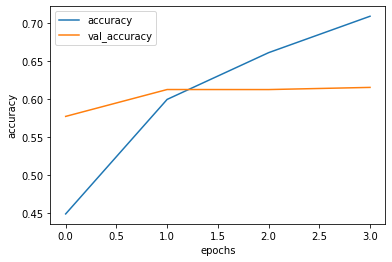

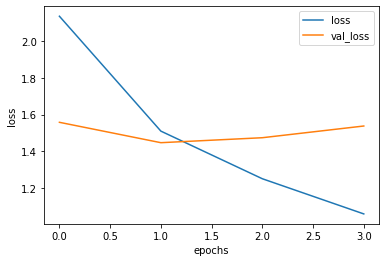

In [16]:
import matplotlib.pyplot as plt

def create_graph(h, s):
    plt.plot(h.history[s])
    plt.plot(h.history["val_"+s])
    plt.xlabel("epochs")
    plt.ylabel(s)
    plt.legend([s,"val_"+s])
    plt.show()

create_graph(history, "accuracy")
create_graph(history, "loss")

### Testing the Model Accuracy with fresh data

In [40]:
saved_model = tf.keras.models.load_model('model')

saved_model.evaluate(x_test, y_test, verbose=2)

608/608 - 4s - loss: 1.5396 - accuracy: 0.6158


[1.5396413803100586, 0.6157881021499634]

### Perform Test on Manual Data

In [42]:
sentences =["Man killed in shark attack in Western Australia", "Shooting at Wisconsin mall leaves 8 injured", "10,000 People Watched Us Get Married In The Middle Of A Pandemic And It Was Magical", 
            "Trump Wonders Why Joe Biden Is Forming A Cabinet In Latest Tweet Screed", "France pulls ambassador to Turkey after Erdogan calls for mental health check for Macron", 
            "Paul Hornung, NFL Hall Of Fame Running Back, Dies At 84", "Stock-market investors brace for busiest week of earnings in October",
            "Software Dominates Deloitte’s 2020 Tech Fast 500 With 71% Of All Companies", "NASA will be 'hard-pressed' to land astronauts on moon in 2024"] 

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_len, padding='pre', truncating='pre')

y_prob = model.predict(padded) 
y_classes = y_prob.argmax(axis=-1)

label_encode_key = list(labels_encode.keys())
labels_encode_value = list(labels_encode.values())

for idx, i in enumerate(y_classes):
    print(f'News: {sentences[idx]}\nCategory: {label_encode_key[labels_encode_value.index(i)]} \n' )

News: Man killed in shark attack in Western Australia
Category: THE WORLDPOST 

News: Shooting at Wisconsin mall leaves 8 injured
Category: CRIME 

News: 10,000 People Watched Us Get Married In The Middle Of A Pandemic And It Was Magical
Category: WEDDINGS 

News: Trump Wonders Why Joe Biden Is Forming A Cabinet In Latest Tweet Screed
Category: POLITICS 

News: France pulls ambassador to Turkey after Erdogan calls for mental health check for Macron
Category: THE WORLDPOST 

News: Paul Hornung, NFL Hall Of Fame Running Back, Dies At 84
Category: SPORTS 

News: Stock-market investors brace for busiest week of earnings in October
Category: BUSINESS 

News: Software Dominates Deloitte’s 2020 Tech Fast 500 With 71% Of All Companies
Category: TECH 

News: NASA will be 'hard-pressed' to land astronauts on moon in 2024
Category: SCIENCE 

